In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from utils.load_data_for_eda import load_data
from utils.exemplar_analysis import select_exemplars, time_series_extractor, plot_time_series

df = load_data('data/commodity_prices.csv')
df_grouped = pd.read_csv('data/important_feature_groups.csv')

rep_exemplars, vol_exemplars = select_exemplars(df_grouped)

Feature: Commodity
Different exemplars → plotting both


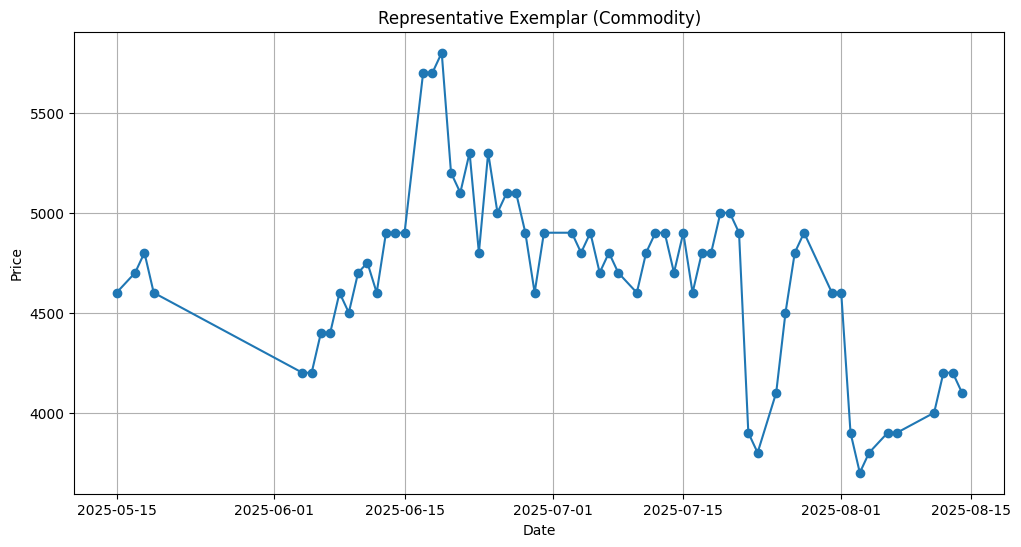

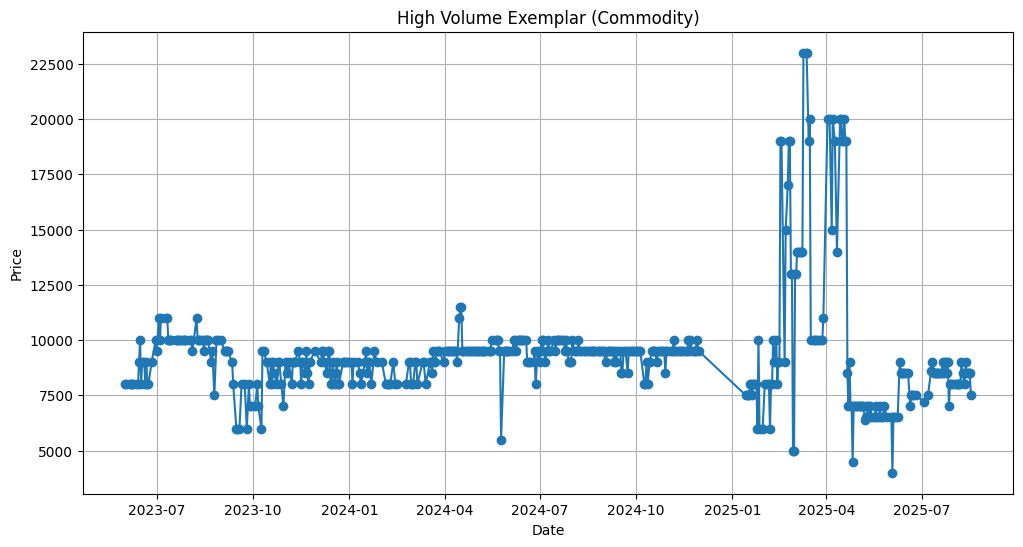

Feature: Commodity|Market
Different exemplars → plotting both


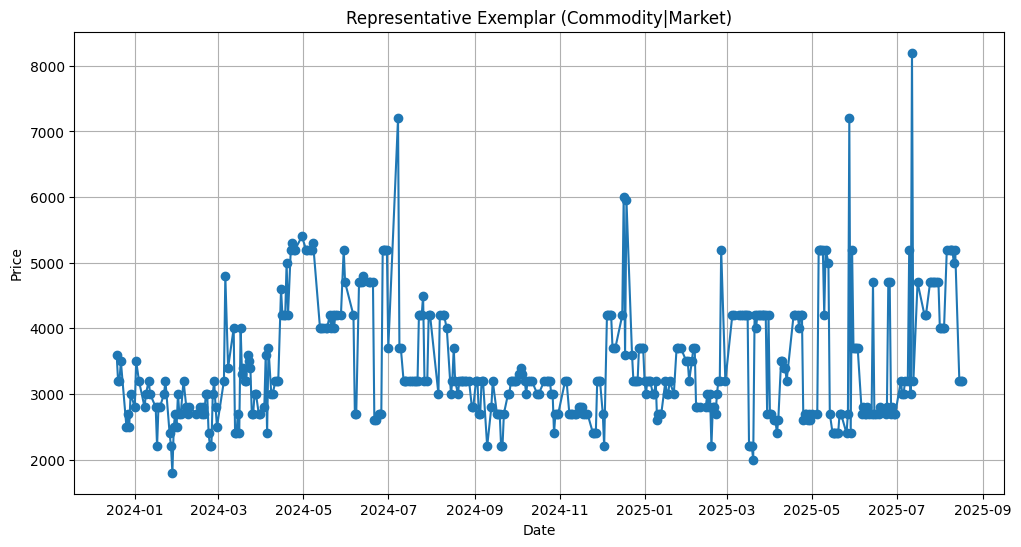

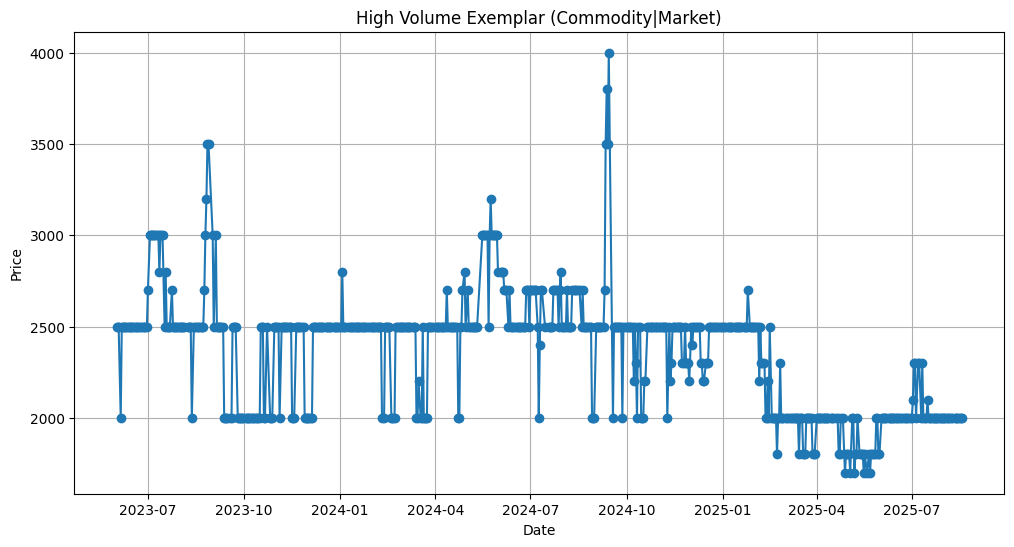

Feature: Commodity|Market|Year
Different exemplars → plotting both


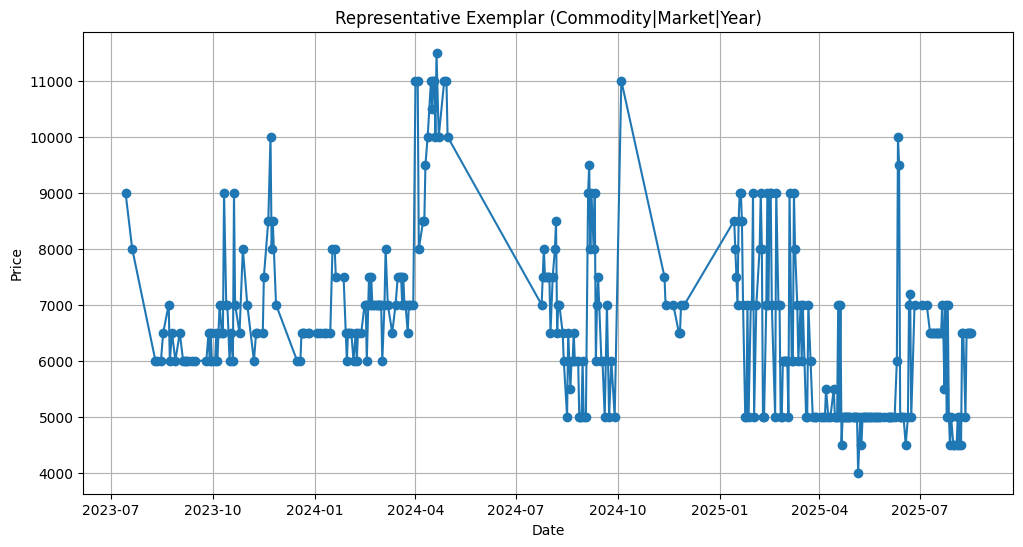

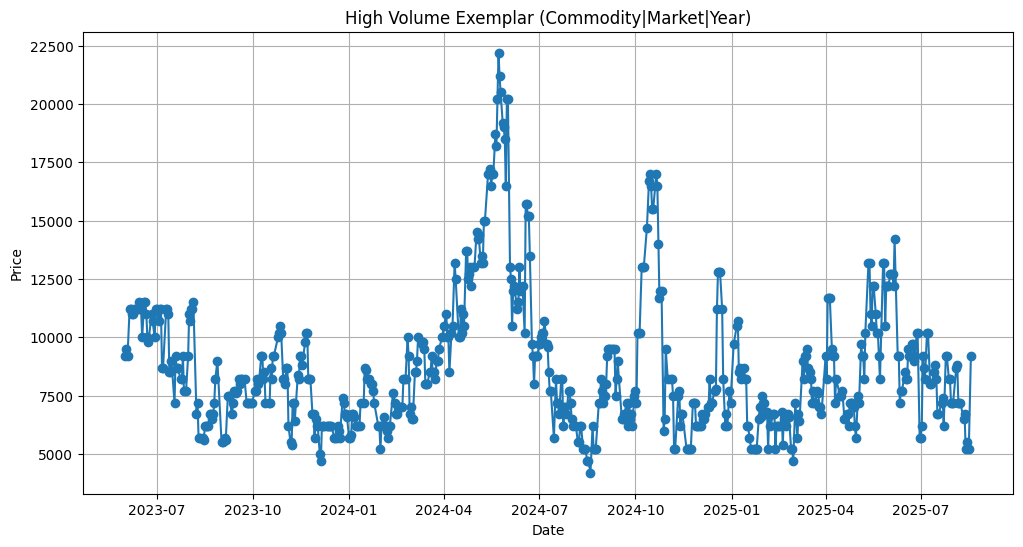

Feature: Commodity|Season
Different exemplars → plotting both


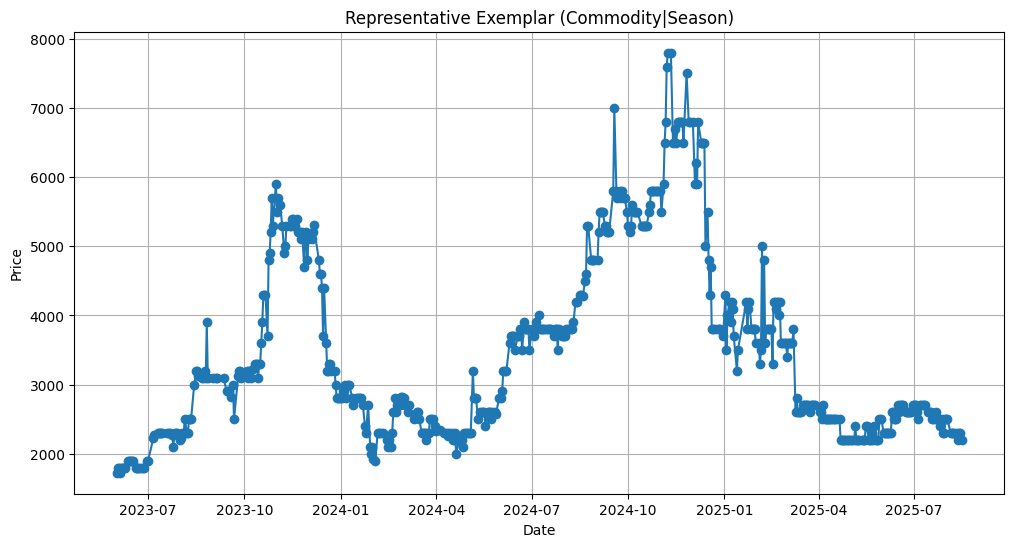

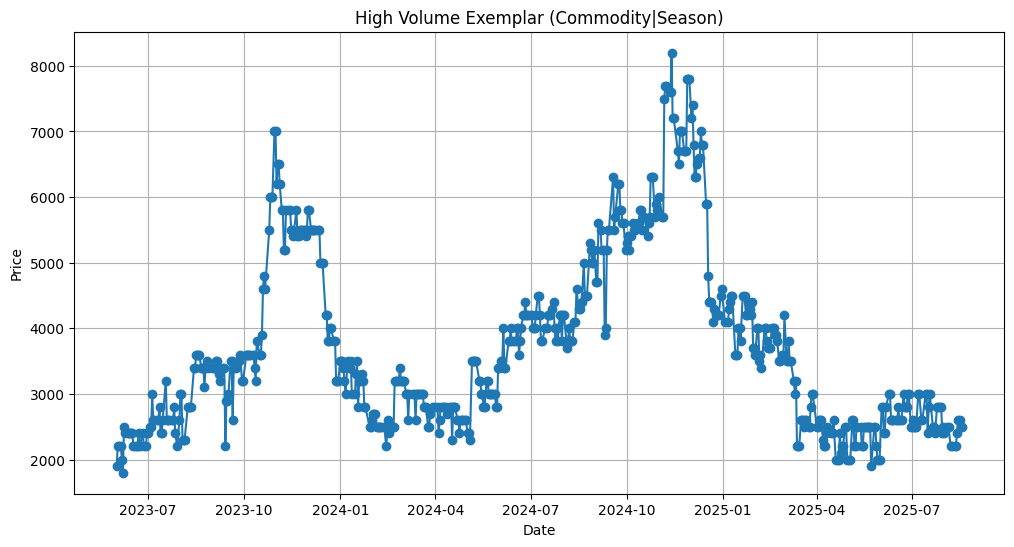

Feature: Commodity|Season|Market
Representative is the same as High Volume exemplar


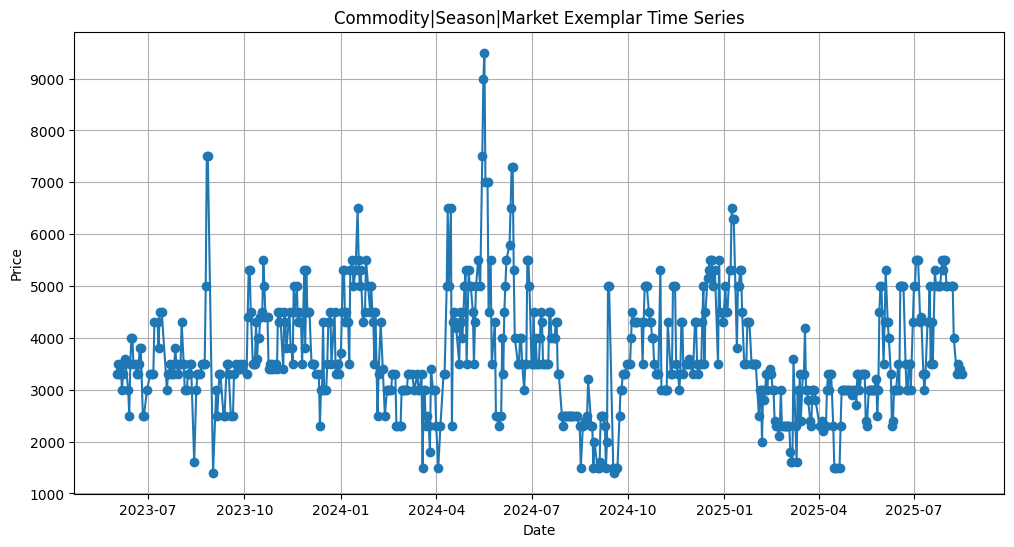

Feature: Commodity|Season|Market|Year
Different exemplars → plotting both


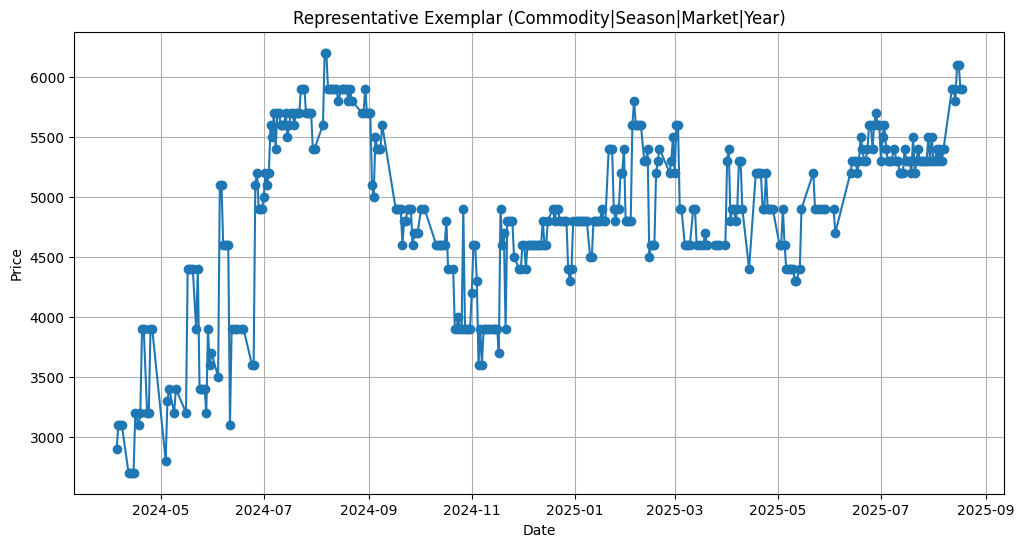

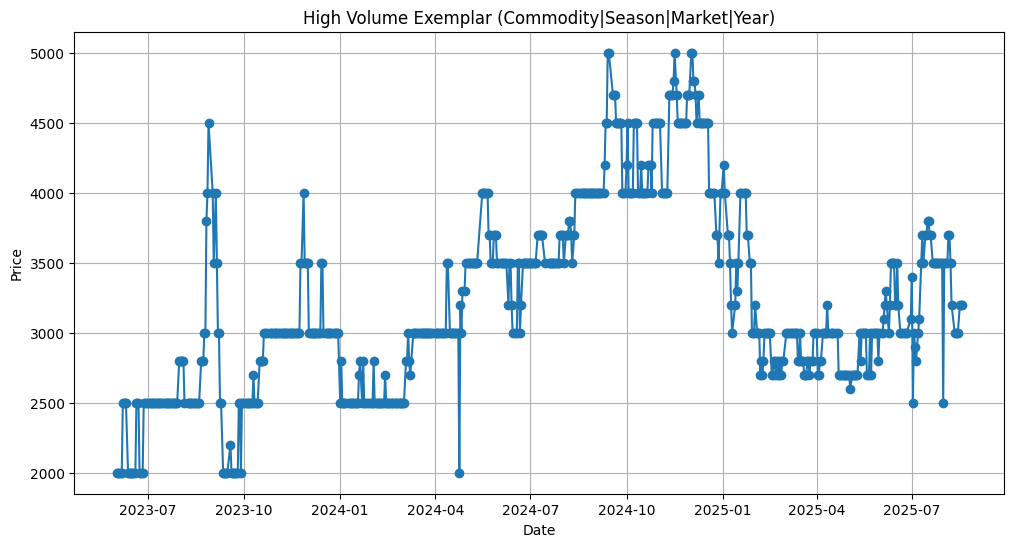

Feature: Commodity|Season|Year
Different exemplars → plotting both


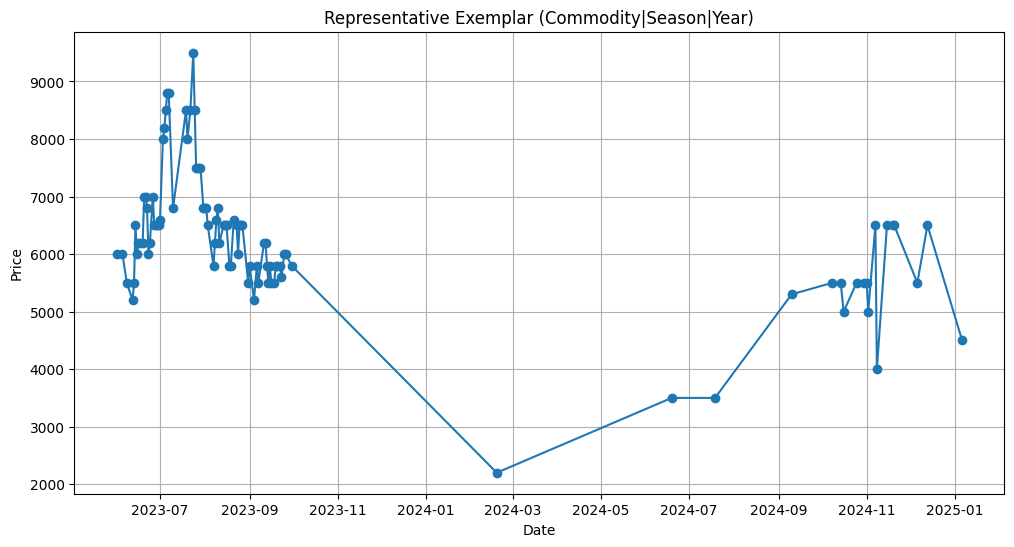

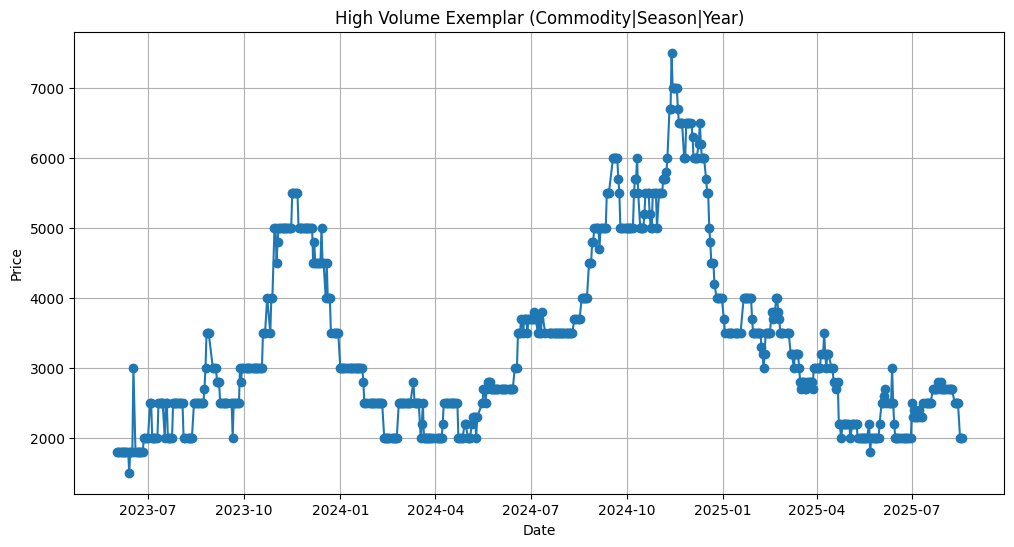

Feature: Commodity|Variety_Type
Different exemplars → plotting both


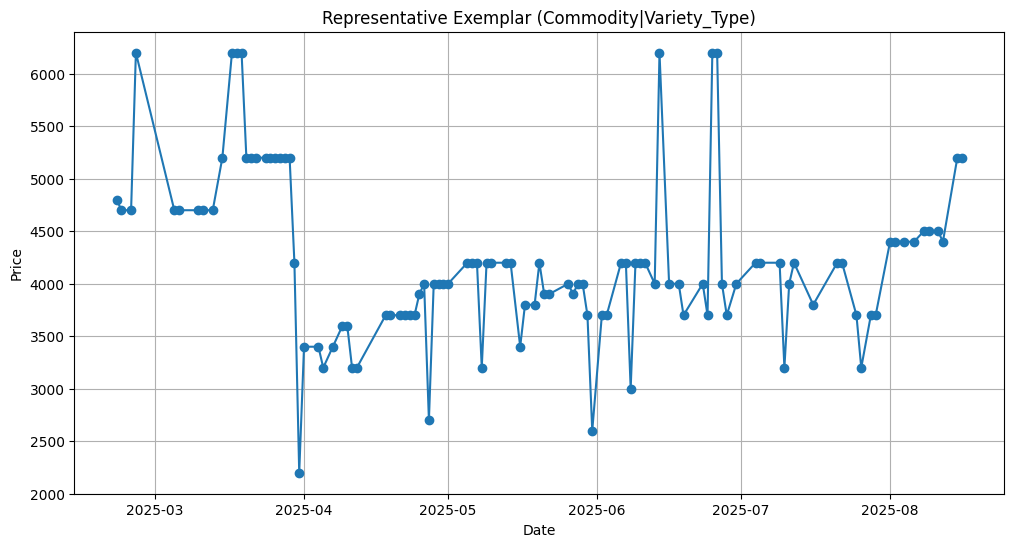

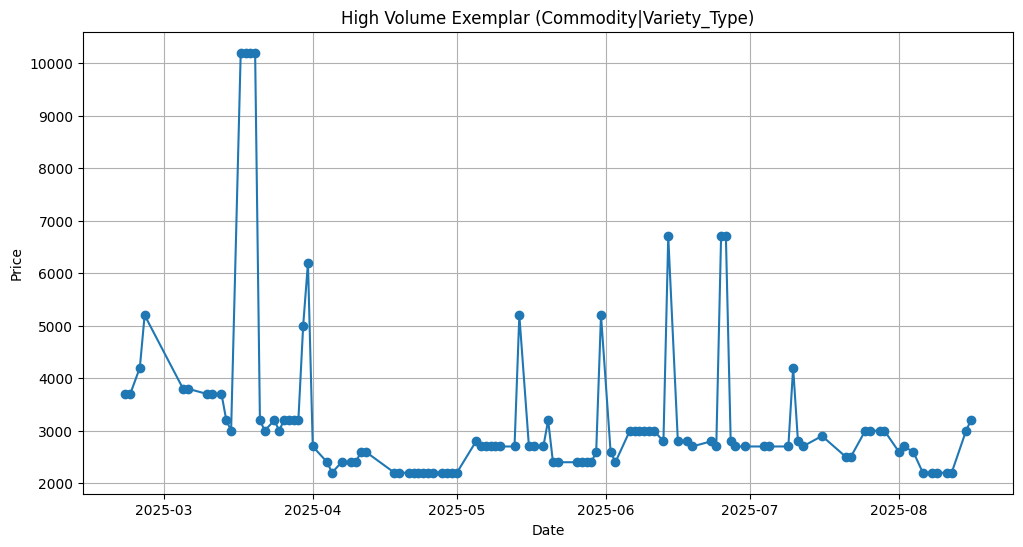

Feature: Commodity|Variety_Type|Market|Year
Different exemplars → plotting both


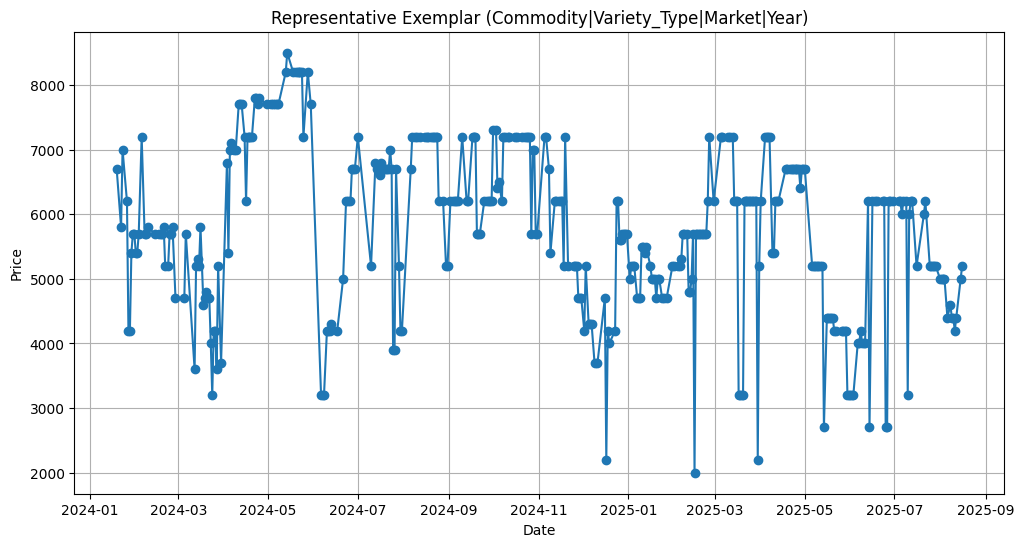

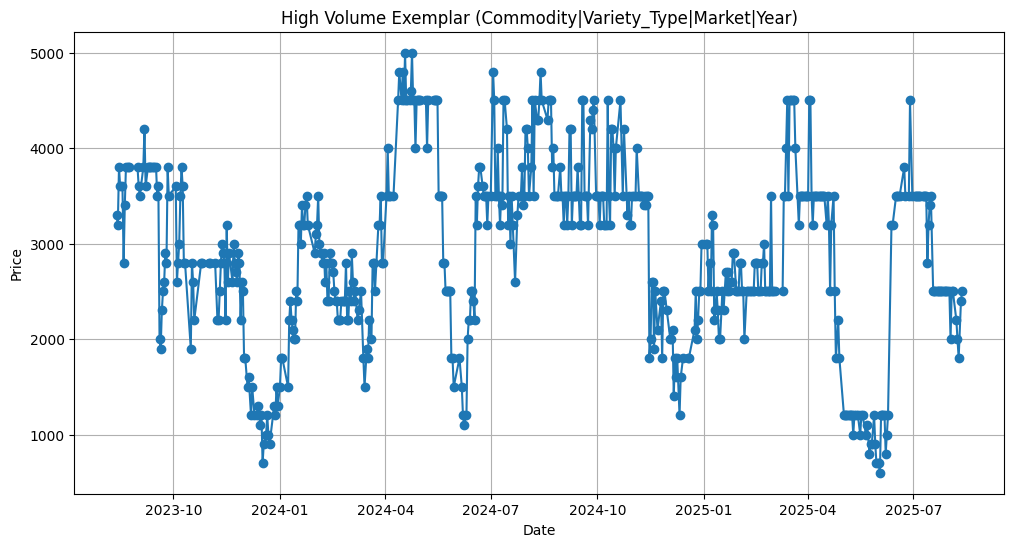

Feature: Commodity|Variety_Type|Season|Market
Different exemplars → plotting both


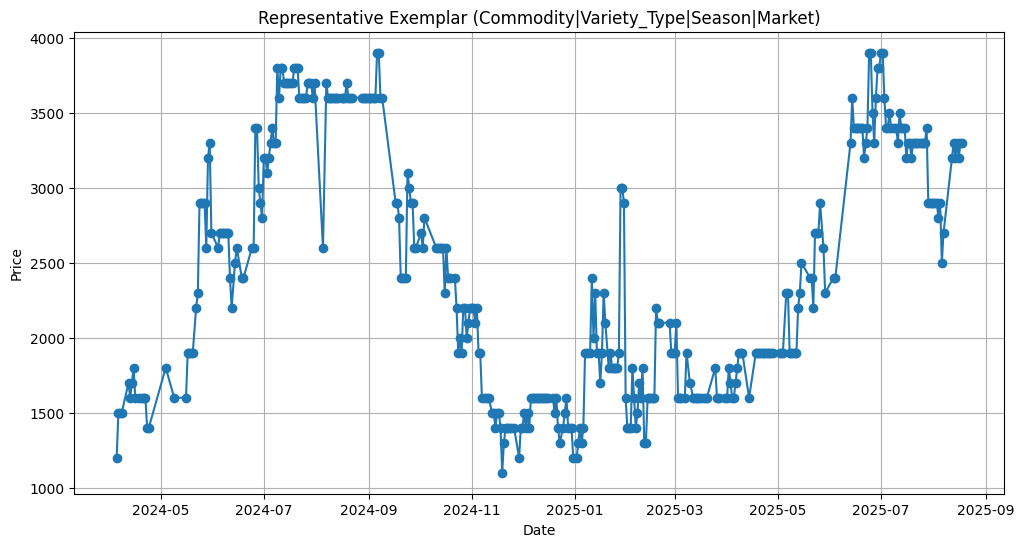

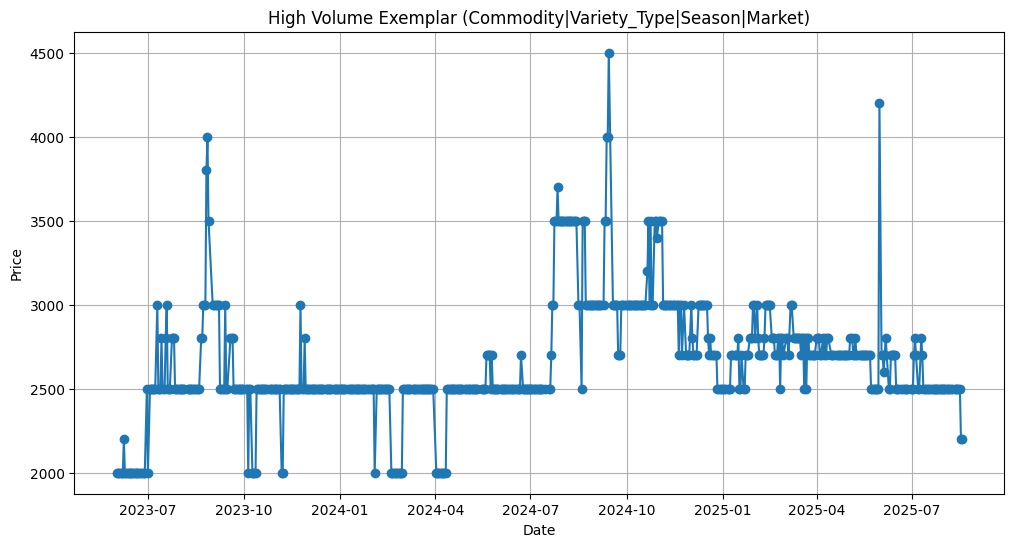

Feature: Commodity|Variety_Type|Season|Market|Year
Representative is the same as High Volume exemplar


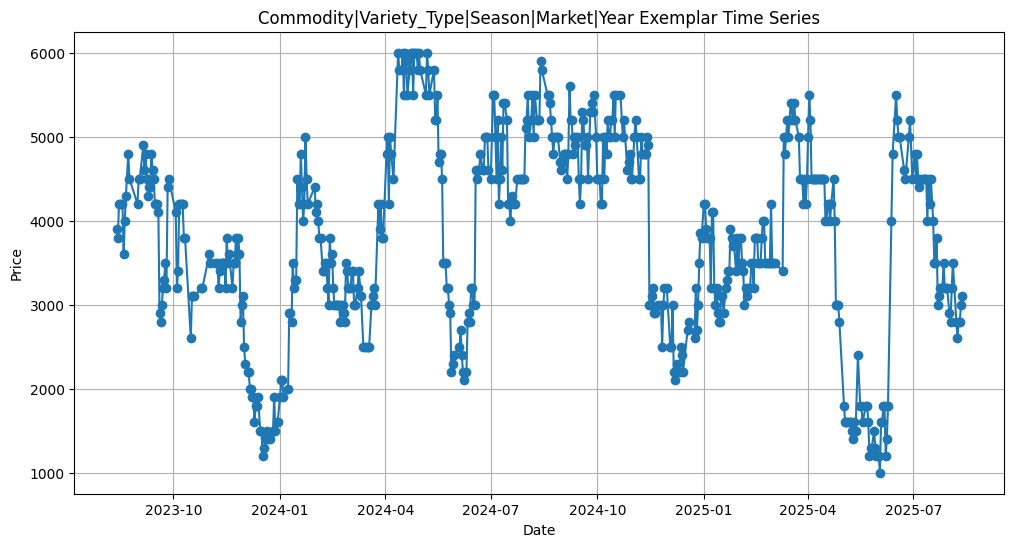

Feature: Commodity|Variety_Type|Season|Year
Different exemplars → plotting both


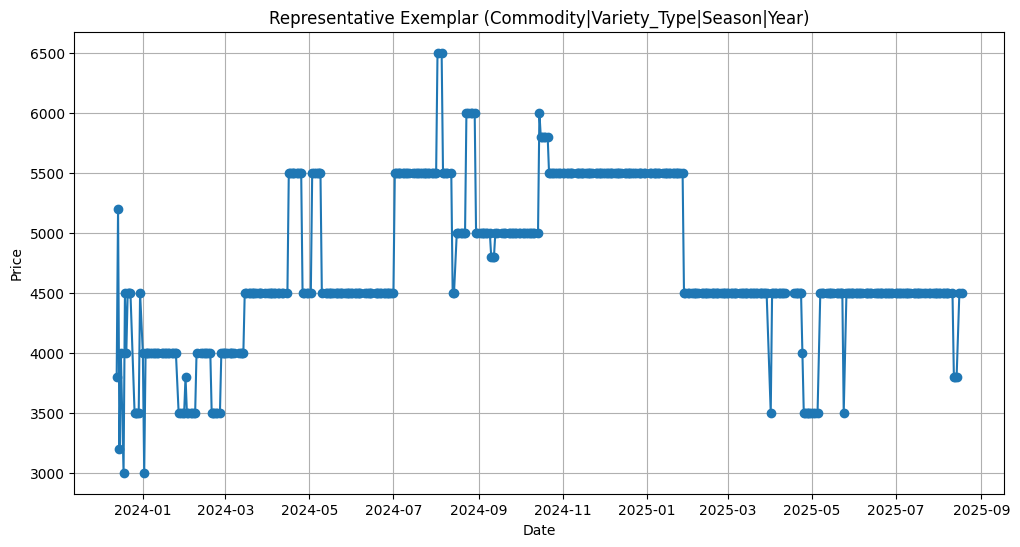

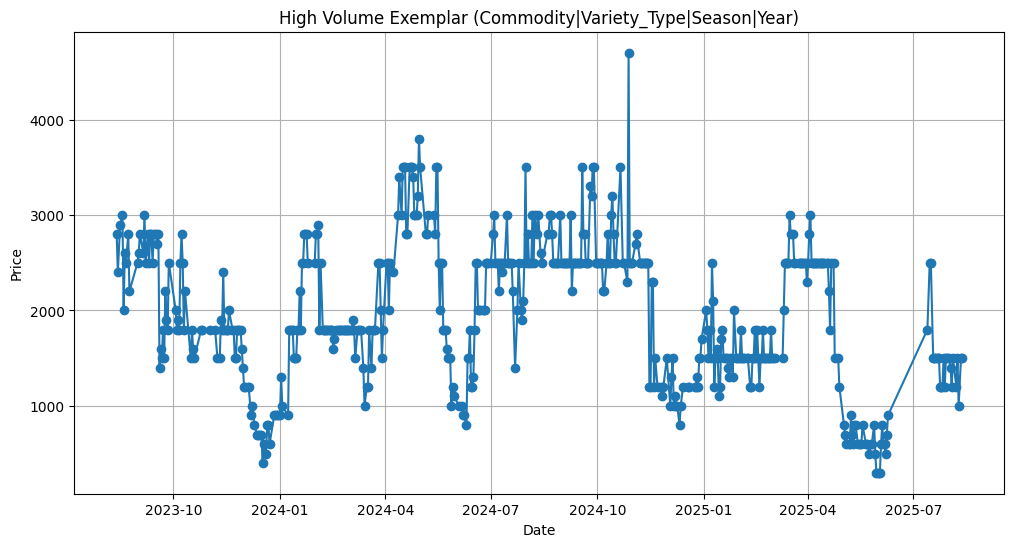

Feature: Commodity|Year
Representative is the same as High Volume exemplar


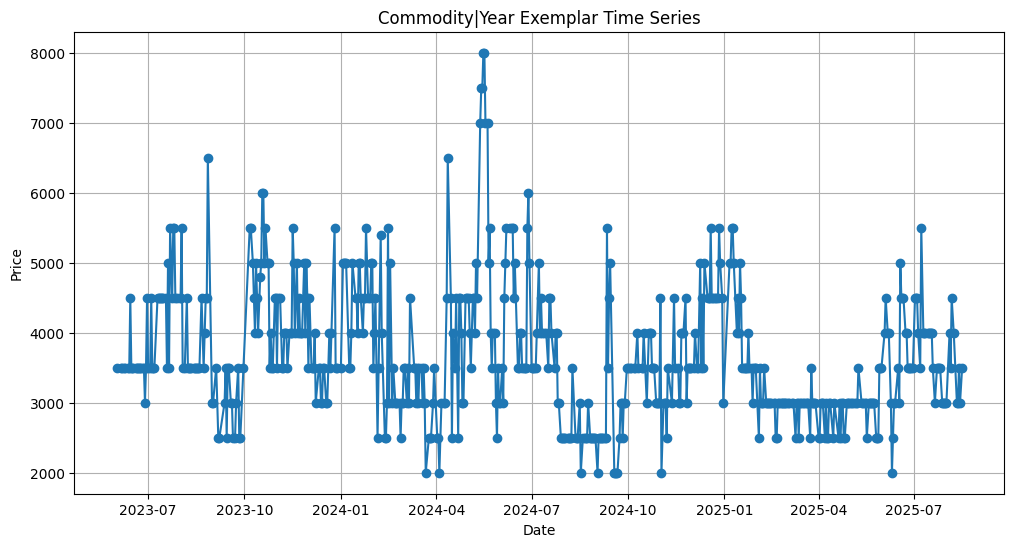

Feature: Market
Different exemplars → plotting both


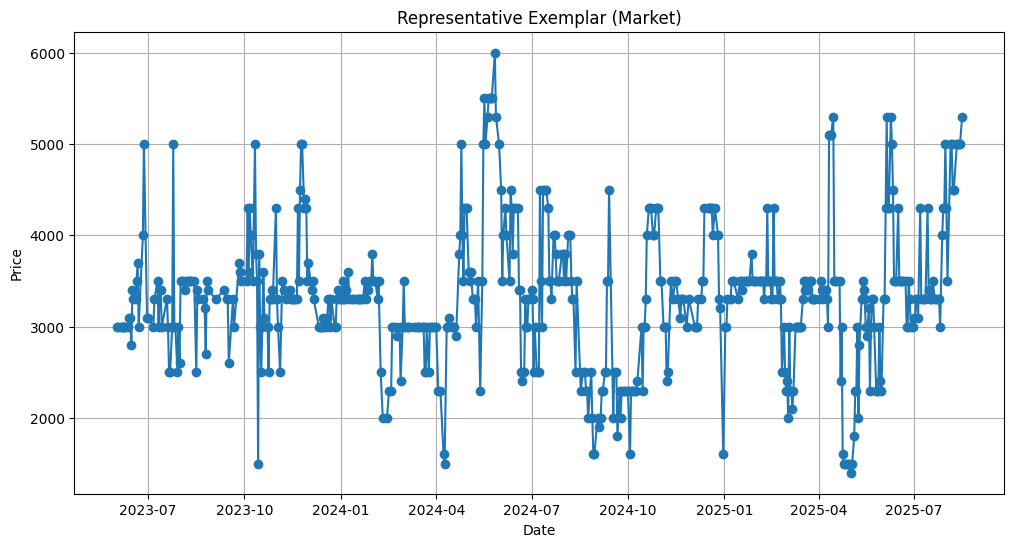

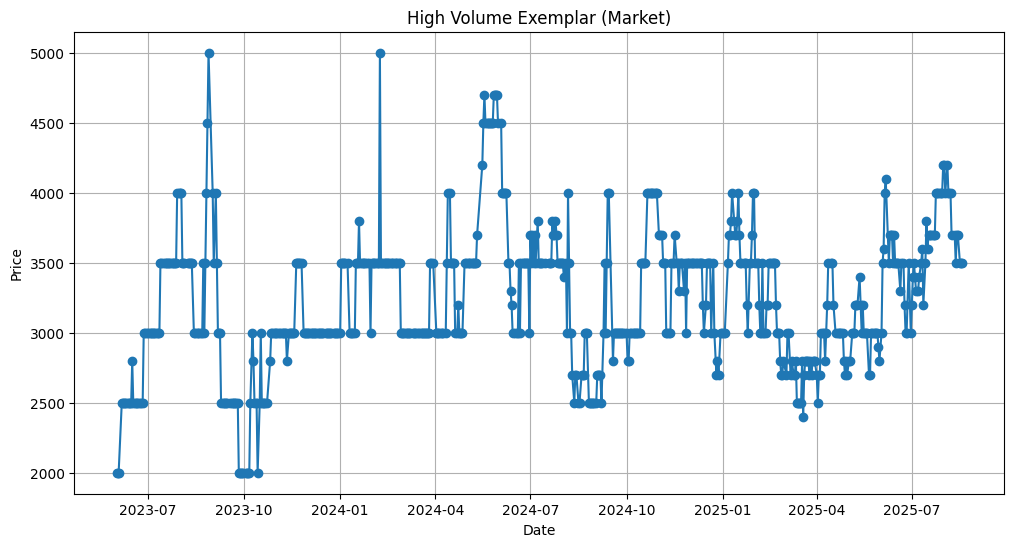

Feature: Market|Year
Different exemplars → plotting both


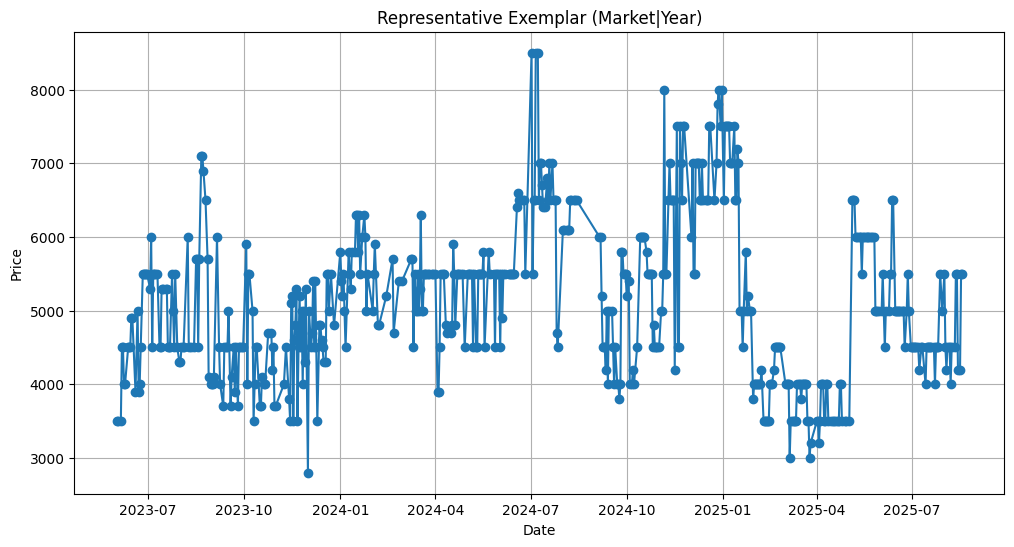

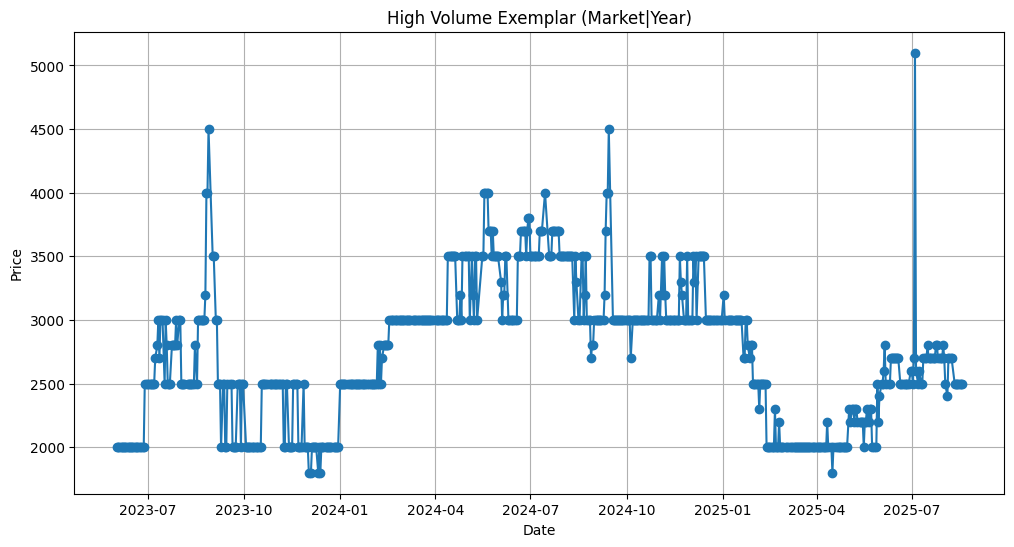

Feature: Season
Different exemplars → plotting both


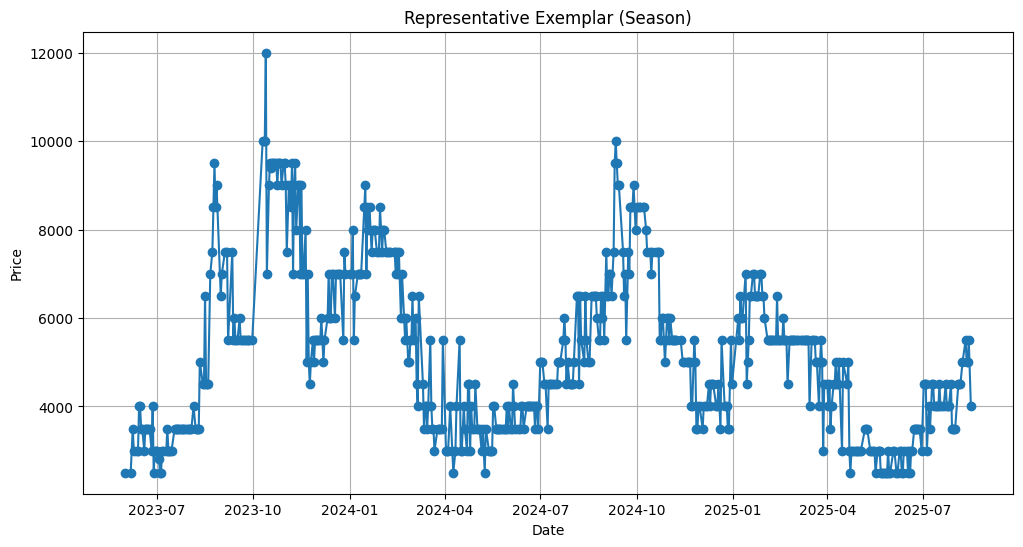

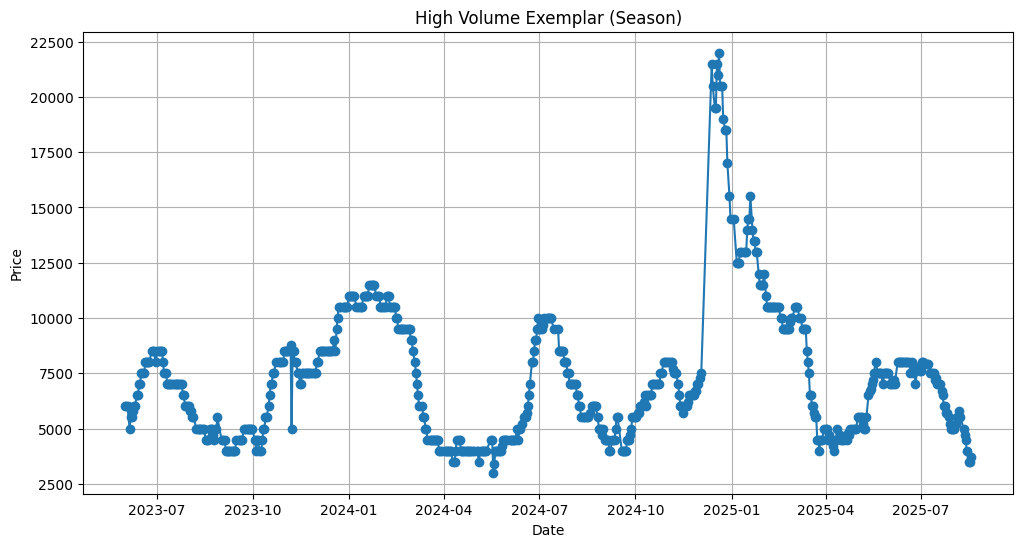

Feature: Season|Market
Different exemplars → plotting both


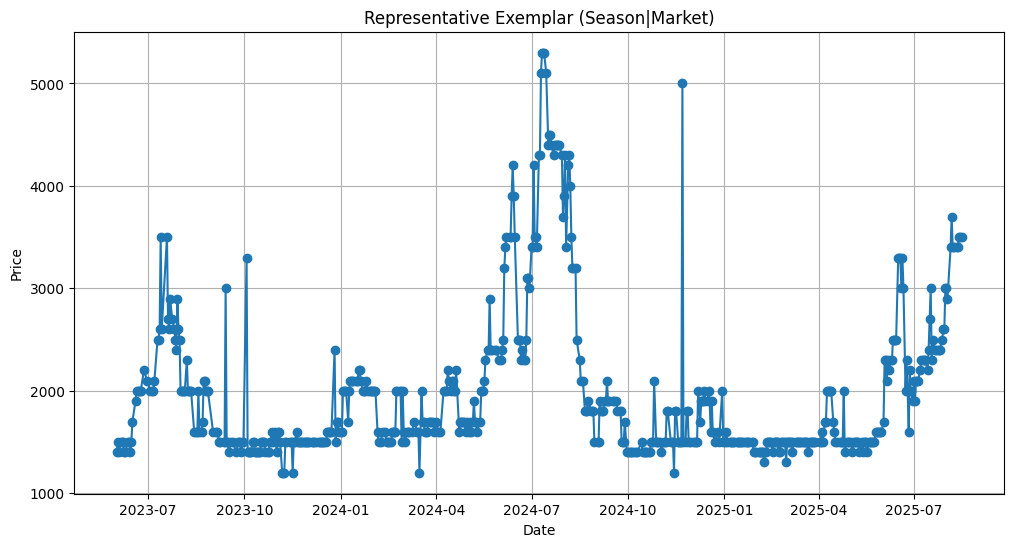

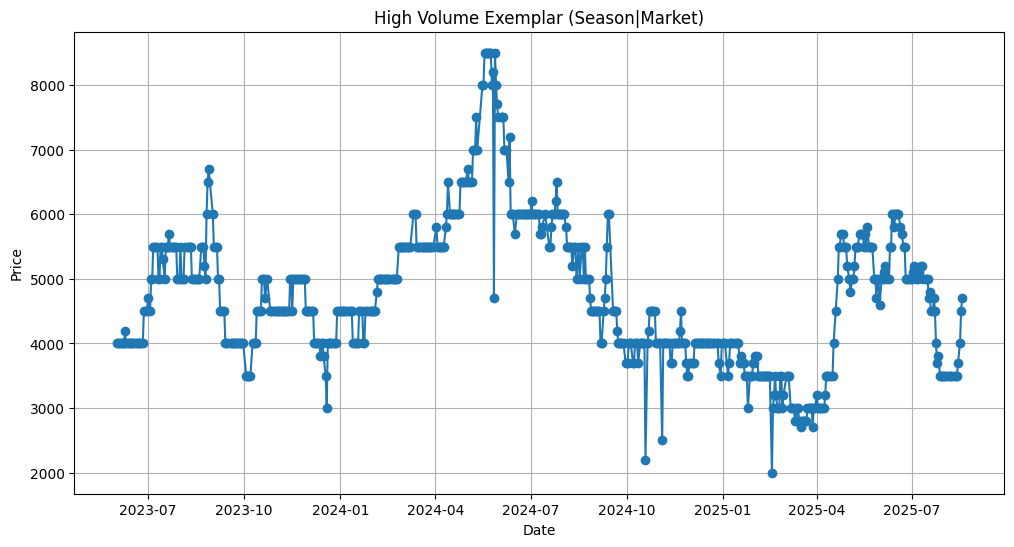

Feature: Season|Market|Year
Different exemplars → plotting both


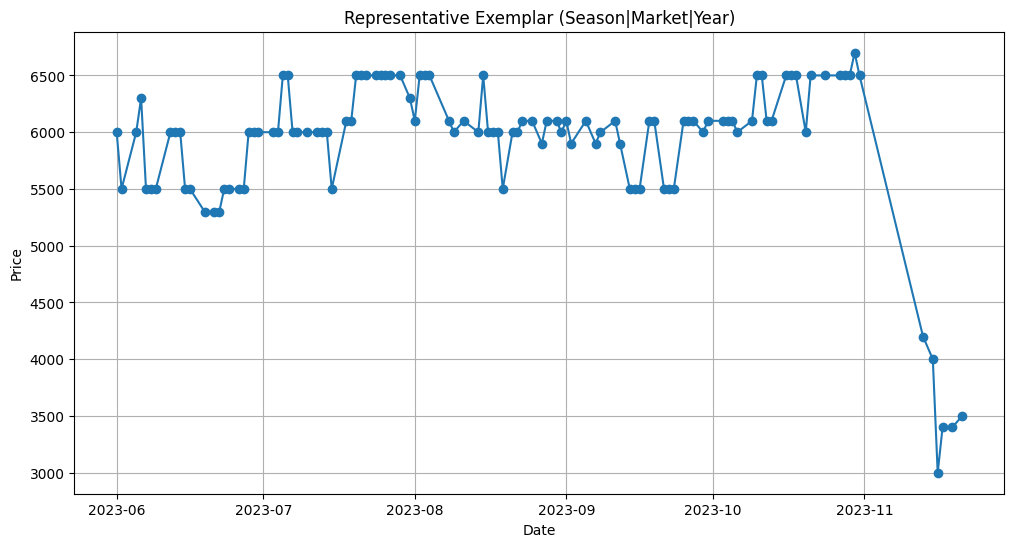

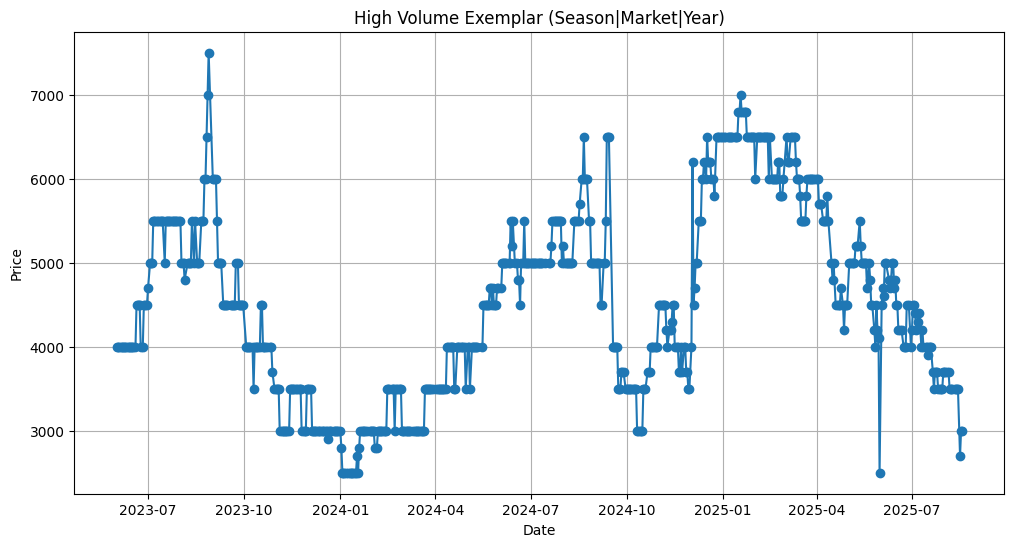

Feature: Season|Year
Different exemplars → plotting both


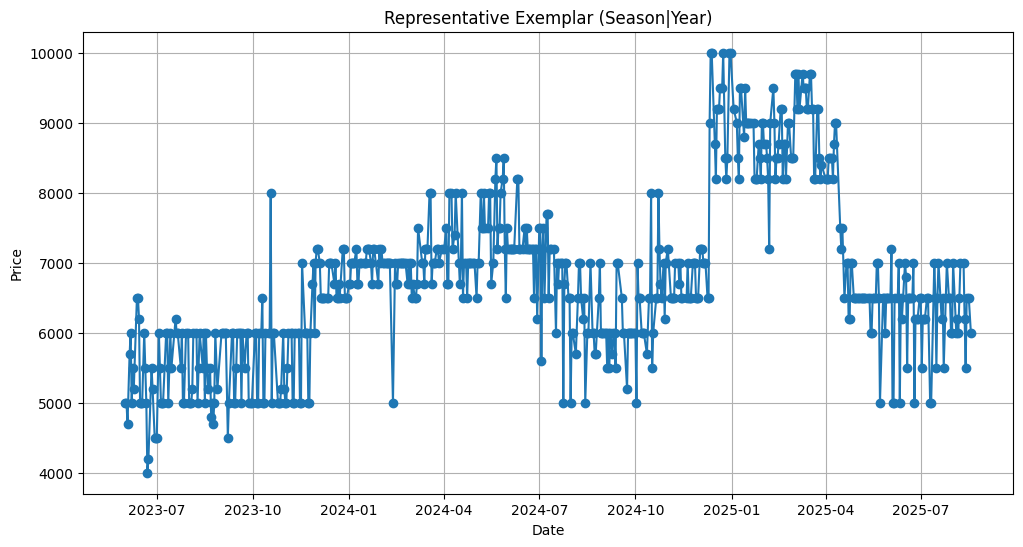

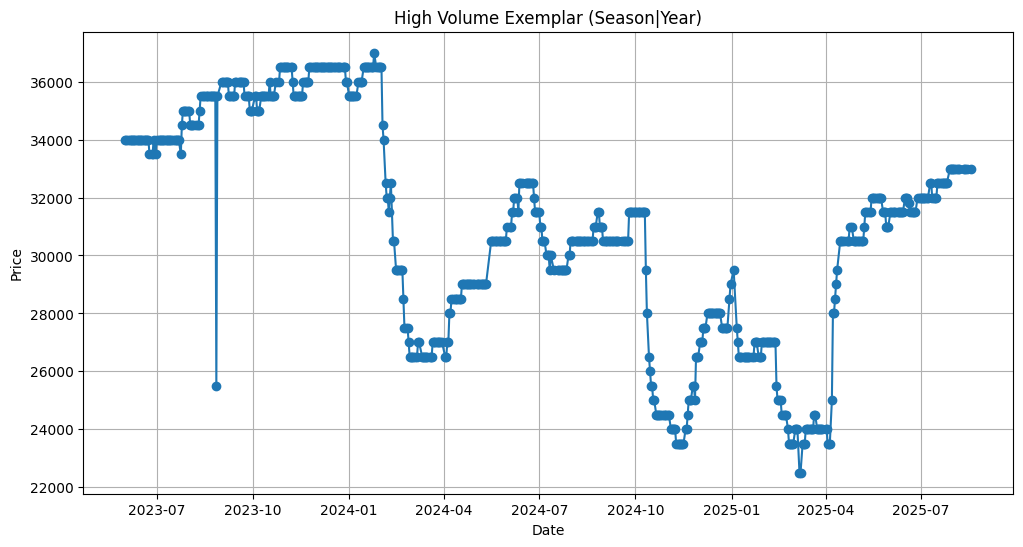

Feature: Year
Representative is the same as High Volume exemplar


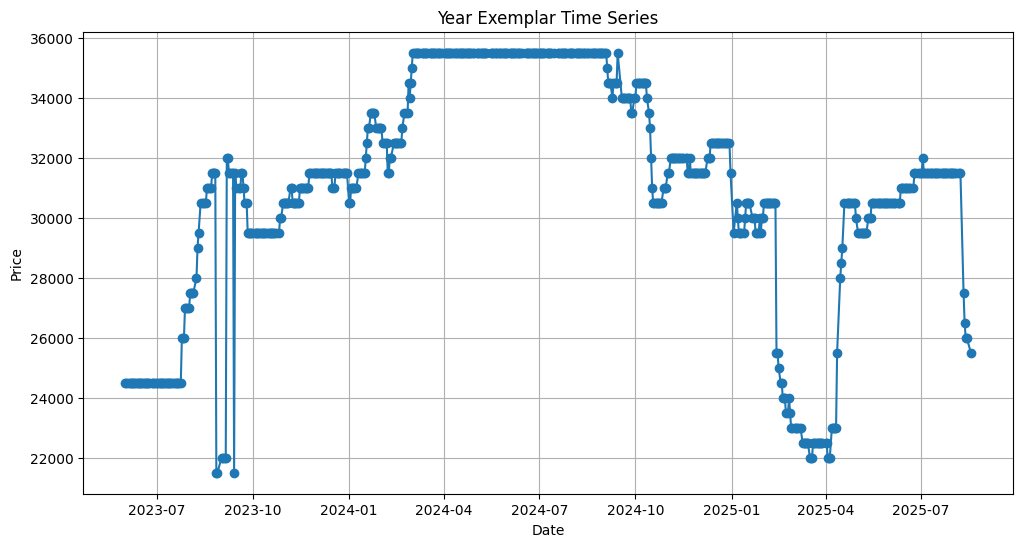

In [16]:
for feature in rep_exemplars.keys():
    print(f'Feature: {feature}')
    df_rep, df_vol = time_series_extractor(df, feature, rep_exemplars, vol_exemplars)
    if df_rep.equals(df_vol):
        print("Representative is the same as High Volume exemplar")
        plot_time_series(df_rep["Modal_Price"], title=f"{feature} Exemplar Time Series")
    else:
        print("Different exemplars → plotting both")
        plot_time_series(df_rep["Modal_Price"], title=f"Representative Exemplar ({feature})")
        plot_time_series(df_vol["Modal_Price"], title=f"High Volume Exemplar ({feature})")
    

In [3]:
df['Product_Type'].nunique(), df['Market'].nunique()

(124, 28)

In [4]:
df['Arrival_Date'].min(), df['Arrival_Date'].max()

(Timestamp('2023-06-01 00:00:00'), Timestamp('2025-08-18 00:00:00'))

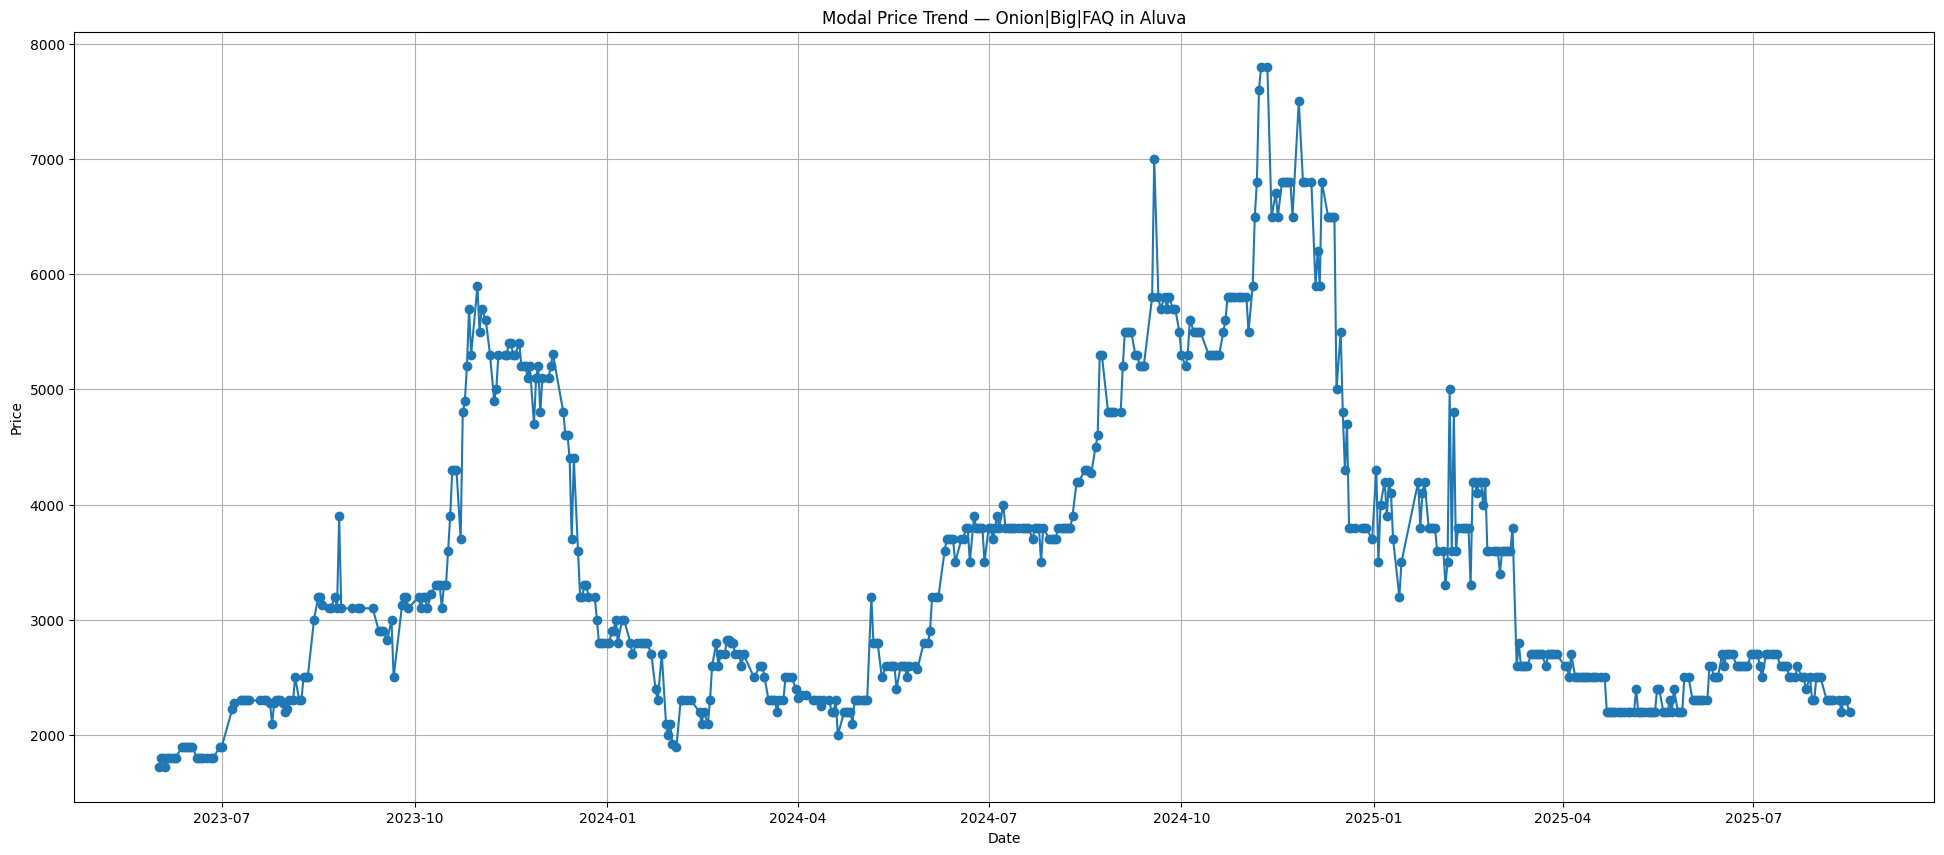

In [5]:
df_sub = df[(df['Product_Type'] == "Onion|Big|FAQ") & (df['Market'] == "Aluva")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub['Modal_Price'], marker='o')
plt.title(f'Modal Price Trend — Onion|Big|FAQ in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')
plt.yticks
plt.grid(True)
plt.show()

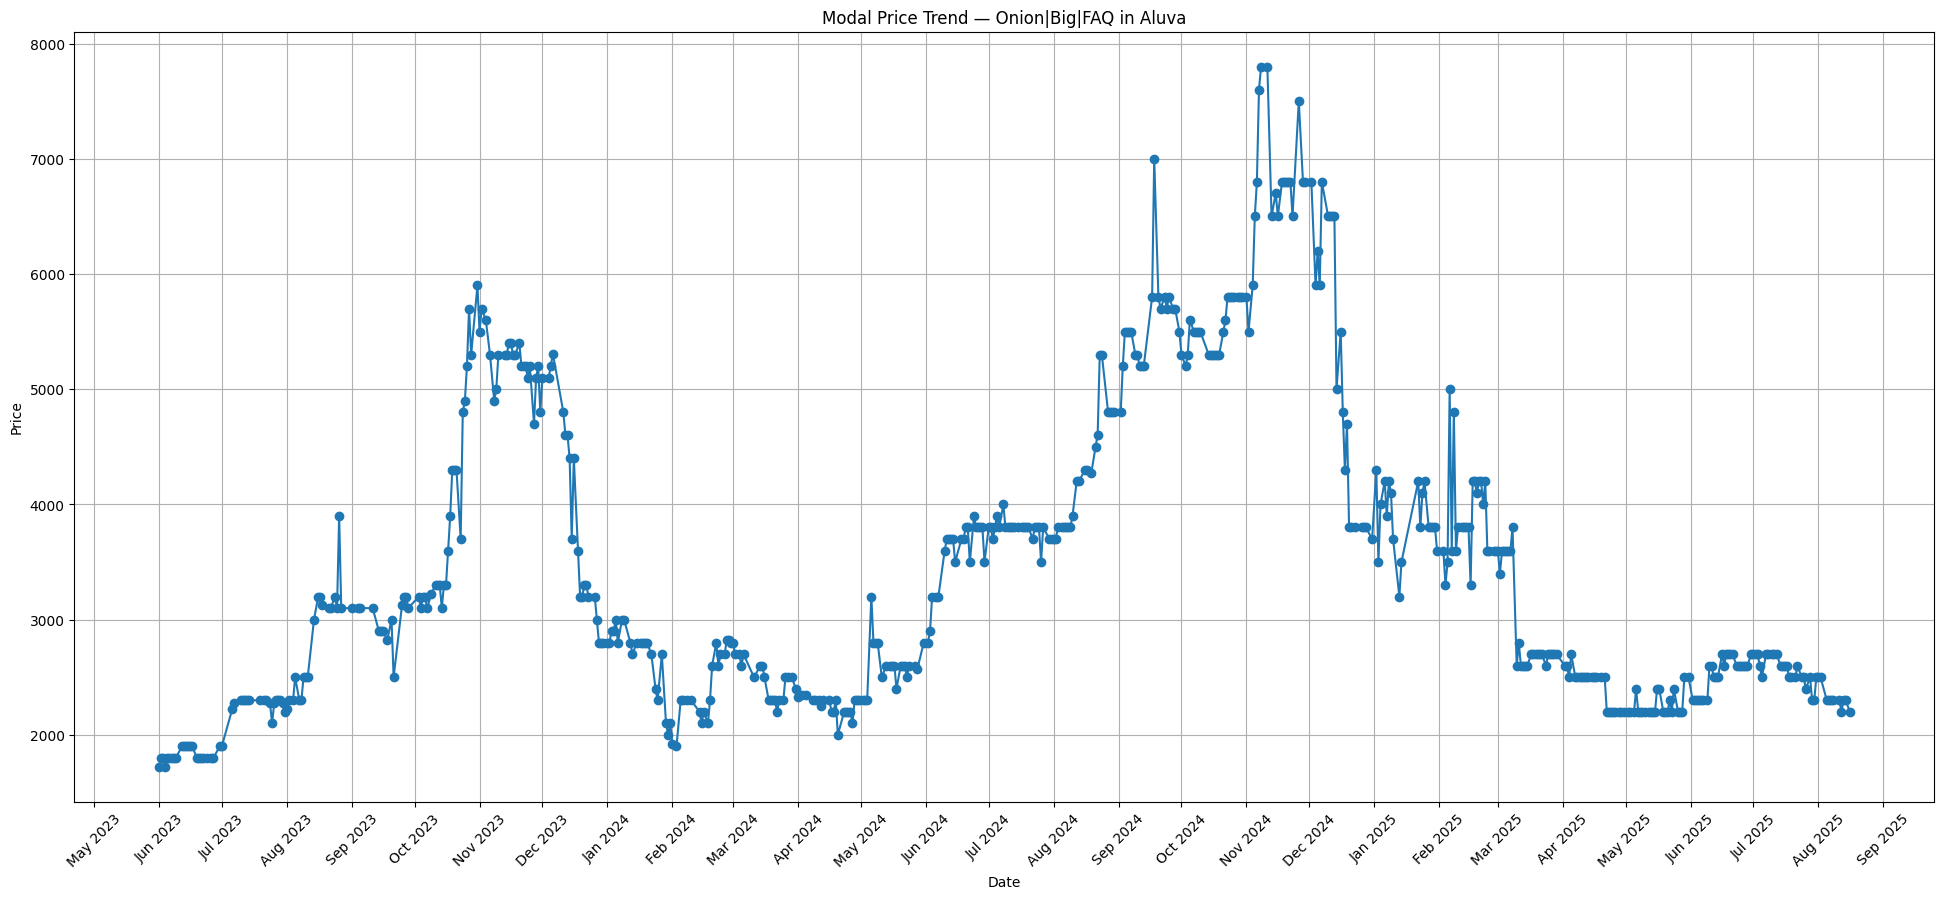

In [ ]:
import matplotlib.dates as mdates

df_sub = df[(df['Product_Type'] == "Onion|Big|FAQ") & (df['Market'] == "Aluva")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub.index, df_sub['Modal_Pricea'], marker='o')

# Title & labels
plt.title('Modal Price Trend — Onion|Big|FAQ in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')

# Show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: "Jan 2025"

plt.xticks(rotation=45)  # rotate for readability
plt.grid(True)
plt.show()

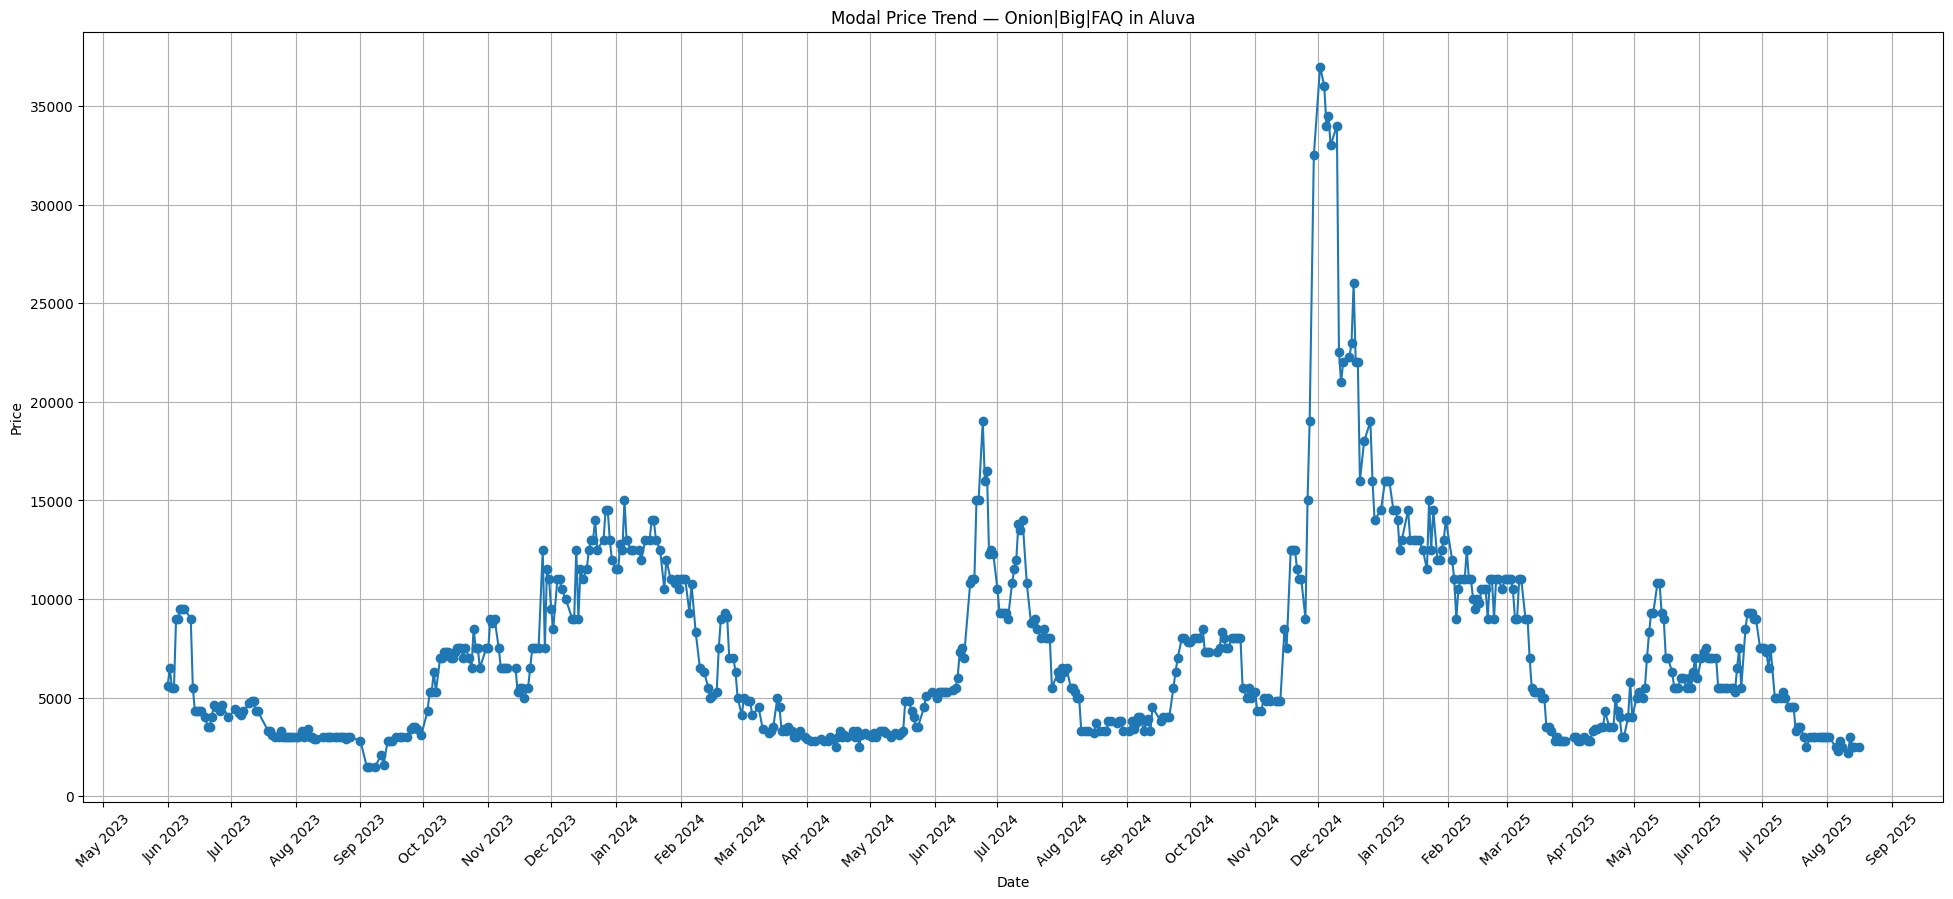

In [ ]:
df_sub = df[(df['Product_Type'] == "Drumstick|Drumstick|FAQ") & (df['Market'] == "Aluva")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub.index, df_sub['Modal_Price'], marker='o')

# Title & labels
plt.title('Modal Price Trend — Drumstick|Drumstick|FAQ in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')

# Show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: "Jan 2025"

plt.xticks(rotation=45)  # rotate for readability
plt.grid(True)
plt.show()

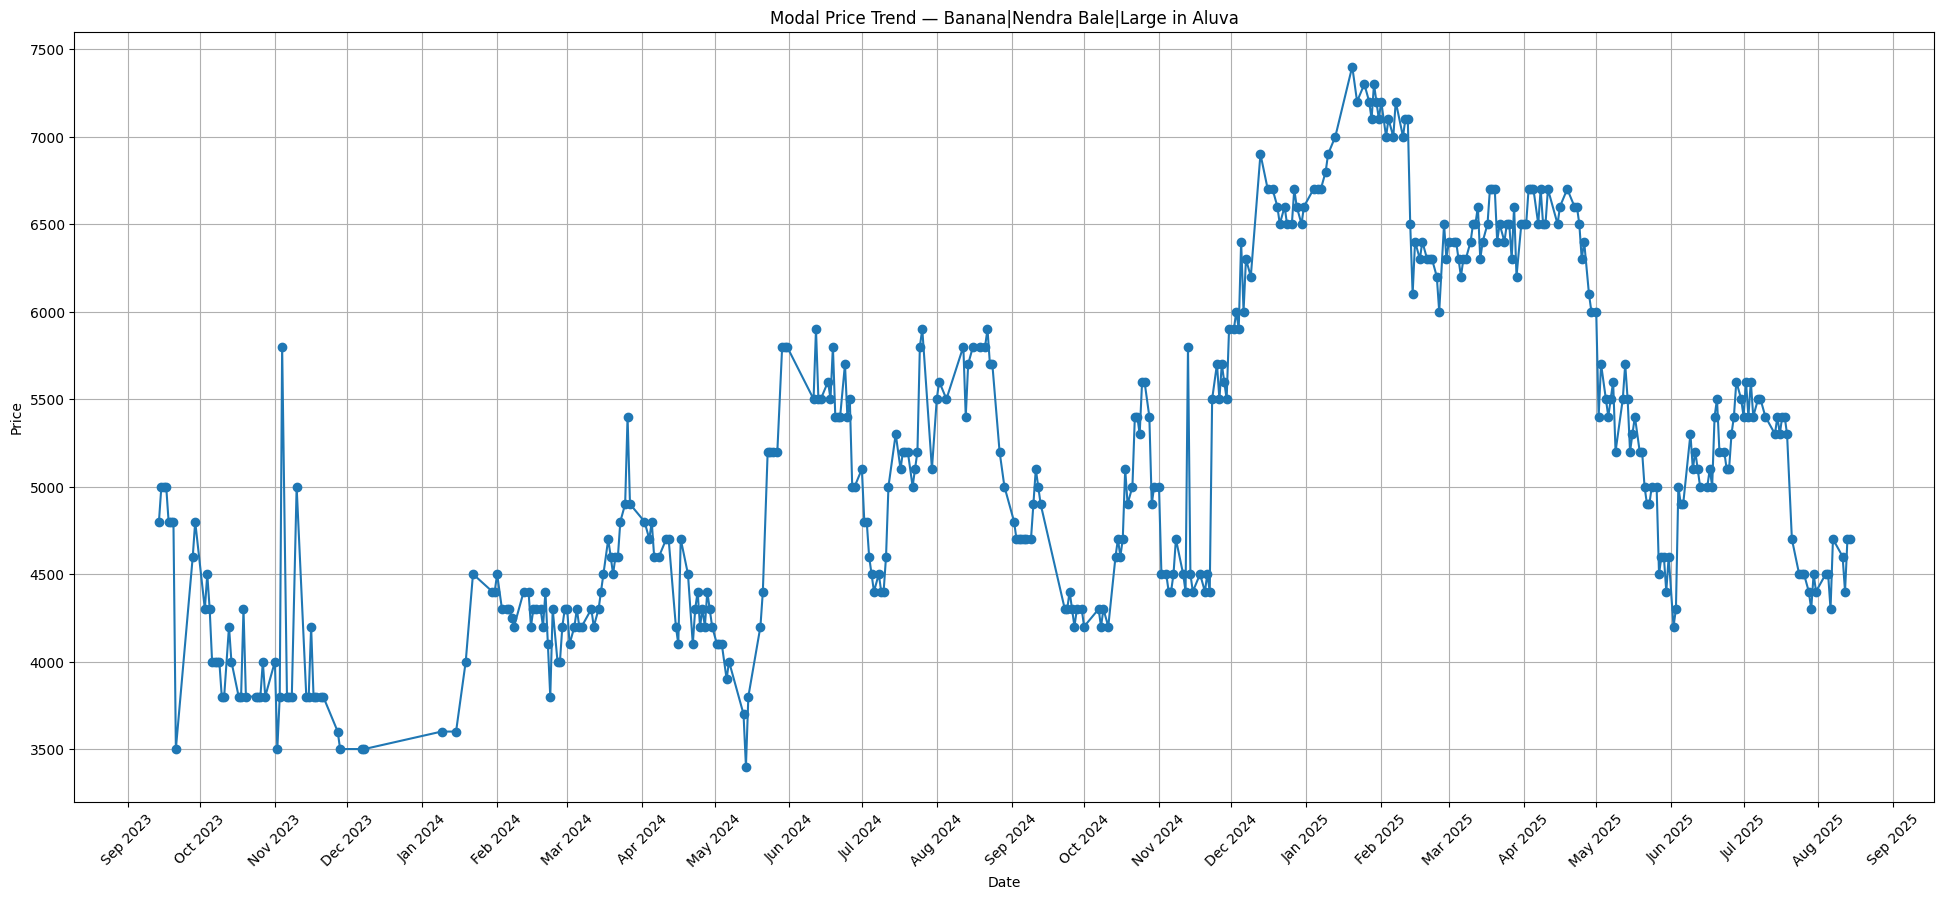

In [17]:
df_sub = df[(df['Product_Type'] == "Banana|Nendra Bale|Large") & (df['Market'] == "Ernakulam")]
df_sub = df_sub[['Arrival_Date', 'Modal_Price']].set_index('Arrival_Date').sort_index()

# Plot raw time series
plt.figure(figsize=(24,10))
plt.plot(df_sub.index, df_sub['Modal_Price'], marker='o')

# Title & labels
plt.title('Modal Price Trend — Banana|Nendra Bale|Large in Aluva')
plt.xlabel('Date')
plt.ylabel('Price')

# Show all months on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())       # tick every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: "Jan 2025"

plt.xticks(rotation=45)  # rotate for readability
plt.grid(True)
plt.show()

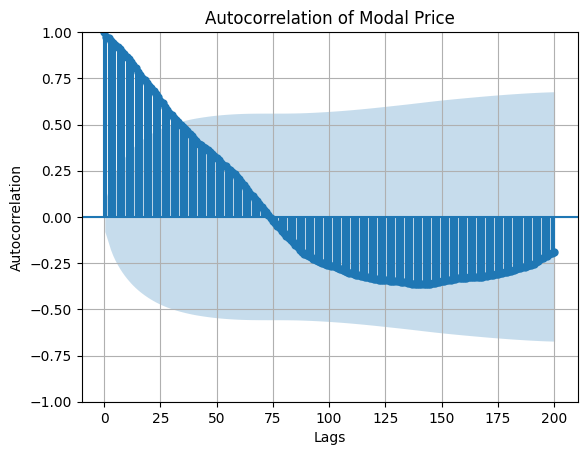

In [7]:

fig = plot_acf(df_sub['Modal_Price'], lags=200)
plt.title('Autocorrelation of Modal Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

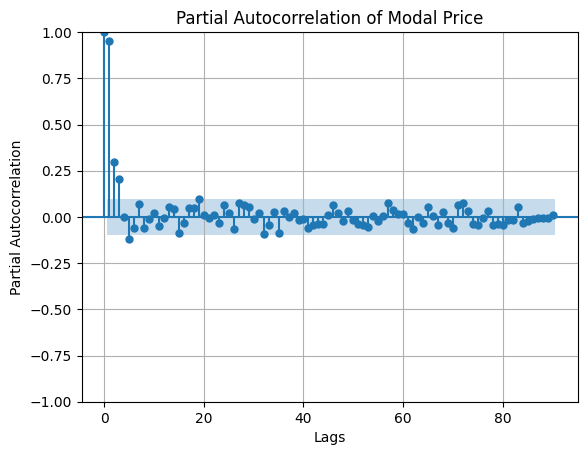

In [5]:
fig = plot_pacf(df_sub['Modal_Price'], lags=90)
plt.title('Partial Autocorrelation of Modal Price')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

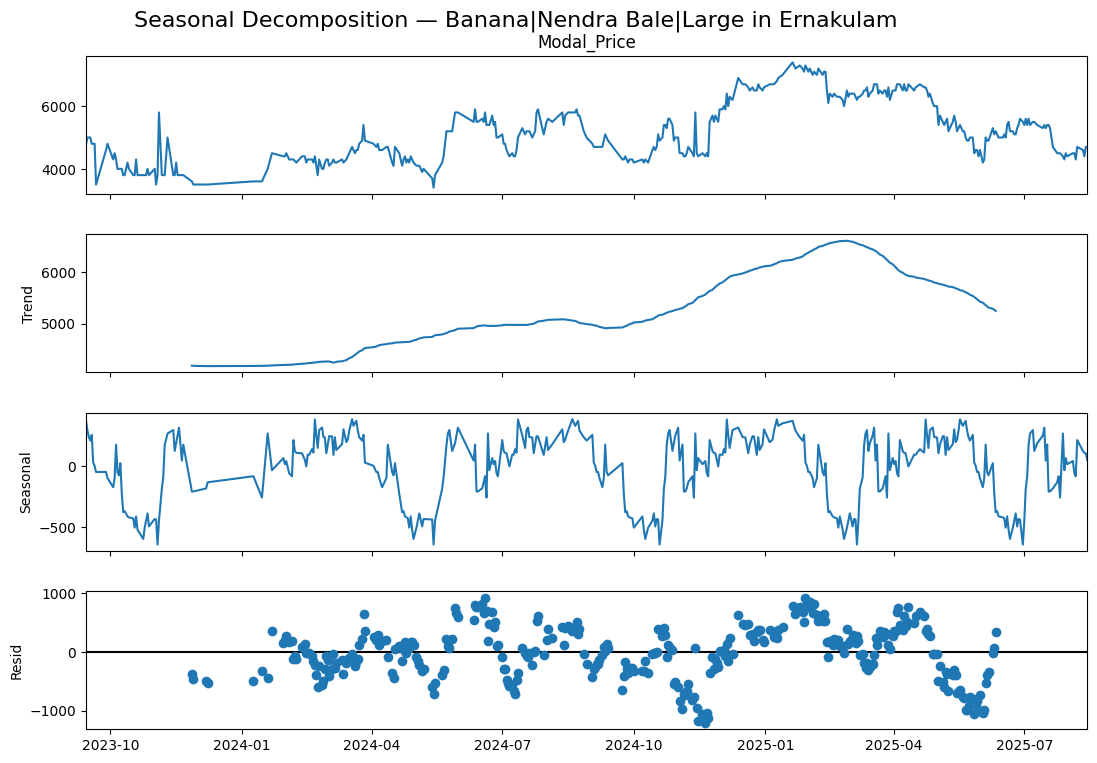

In [9]:
result = seasonal_decompose(df_sub['Modal_Price'], model='additive', period=90)
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle(f'Seasonal Decomposition — Banana|Nendra Bale|Large in Ernakulam', fontsize=16)
plt.show()